In [1]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=5000, noise=0.3)

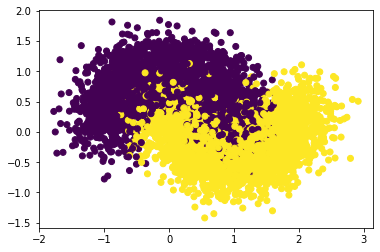

In [2]:
import matplotlib.pyplot as plt

x, y = moons[0], moons[1]
plt.scatter(x[:, 0], x[:, 1], c=y)

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

